# Importing Libraries Used

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading in CarSales.csv

In [2]:
df = pd.read_csv('FILE_PATH_HERE')
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


# Data Understanding
- What is the `shape` of the Dataframe

- What `dtypes` are in the Data

- `describe` some of the numeric values in the Data

In [3]:
df.shape

(23906, 16)

In [4]:
df.dtypes

Car_id           object
Date             object
Customer Name    object
Gender           object
Annual Income     int64
Dealer_Name      object
Company          object
Model            object
Engine           object
Transmission     object
Color            object
Price ($)         int64
Dealer_No        object
Body Style       object
Phone             int64
Dealer_Region    object
dtype: object

In [5]:
df.describe()

,Annual Income,Price ($),Phone
count,2.390600e+04,23906.000000,2.390600e+04
mean,8.308403e+05,28090.247846,7.497741e+06
std,7.200064e+05,14788.687608,8.674920e+05
min,1.008000e+04,1200.000000,6.000101e+06
25%,3.860000e+05,18001.000000,6.746495e+06
50%,7.350000e+05,23000.000000,7.496198e+06
75%,1.175750e+06,34000.000000,8.248146e+06
max,1.120000e+07,85800.000000,8.999579e+06


# Data Prep

- `rename` columns for better querying

- Checking and Dropping any NaN values `isna`

- Checking and Dropping any `duplicated` values

- `drop` unused columns

- `replace` spelling errors

### Rename columns to be able to query later

In [6]:
df.rename(columns={'Customer Name': 'Customer_Name', 'Annual Income': 'Annual_Income', 'Price ($)': 'Price_($)', 'Body Style': 'Body_Style'}, inplace=True)
df.head()

,Car_id,Date,Customer_Name,Gender,Annual_Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price_($),Dealer_No,Body_Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


### Checking if there is any NaN values

In [7]:
df.isna().sum()

Car_id           0
Date             0
Customer_Name    1
Gender           0
Annual_Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price_($)        0
Dealer_No        0
Body_Style       0
Phone            0
Dealer_Region    0
dtype: int64

### Querying to see the row the NaN values is on

In [8]:
df.query('Customer_Name.isna()')

,Car_id,Date,Customer_Name,Gender,Annual_Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price_($),Dealer_No,Body_Style,Phone,Dealer_Region
7564,C_CND_007565,11/5/2022,NaN,Male,680000,Saab-Belle Dodge,Dodge,Ram Pickup,DoubleÂ Overhead Camshaft,Auto,Pale White,45000,60504-7114,Hardtop,7203103,Aurora


### Dropping the row with the NaN value 

In [9]:
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)

In [10]:
df.isna().sum()

Car_id           0
Date             0
Customer_Name    0
Gender           0
Annual_Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price_($)        0
Dealer_No        0
Body_Style       0
Phone            0
Dealer_Region    0
dtype: int64

### Checking and Dropping any Duplicates

In [11]:
df.duplicated()
df.drop_duplicates()
df.reset_index(inplace=True, drop=True)

### Dropping unused Columns

In [12]:
df.drop(columns=["Car_id", "Date", "Customer_Name", "Dealer_No ", "Phone"], inplace=True)
df

,Gender,Annual_Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price_($),Body_Style,Dealer_Region
0,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,SUV,Middletown
1,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,SUV,Aurora
2,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,Passenger,Greenville
3,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,SUV,Pasco
4,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,Hatchback,Janesville
...,...,...,...,...,...,...,...,...,...,...,...
23900,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,Passenger,Pasco
23901,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,Hardtop,Middletown
23902,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,Sedan,Scottsdale
23903,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,Passenger,Austin


### Replacing Spelling Errors in Engine Column

In [13]:
df["Engine"] = df["Engine"].replace('DoubleÂ\xa0Overhead Camshaft', 'Double Overhead Camshaft')
df

,Gender,Annual_Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price_($),Body_Style,Dealer_Region
0,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,Double Overhead Camshaft,Auto,Black,26000,SUV,Middletown
1,Male,1480000,C & M Motors Inc,Dodge,Durango,Double Overhead Camshaft,Auto,Black,19000,SUV,Aurora
2,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,Passenger,Greenville
3,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,SUV,Pasco
4,Male,1465000,Chrysler Plymouth,Acura,TL,Double Overhead Camshaft,Auto,Red,24500,Hatchback,Janesville
...,...,...,...,...,...,...,...,...,...,...,...
23900,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,Passenger,Pasco
23901,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,Double Overhead Camshaft,Auto,Black,16000,Hardtop,Middletown
23902,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,Sedan,Scottsdale
23903,Male,13500,Chrysler Plymouth,Chevrolet,Metro,Double Overhead Camshaft,Auto,Black,31000,Passenger,Austin


# Data Analysis

- #### Number of...
  - Males and Females in the dataset
  - Males and Females who bought from each company
  - Males and Females who bought each model car
  - Cars that were sold from each company
  - Cars sold per Dealer Region
- #### Average
  - Annual Income between Males and Females 
  - Price of a Car per Company
  - Price of a Car per Dealer Region
  - Price a Male and Female are paying for a car 
- #### Most Common Type of...
  - Engine bought
  - Transmission bought
  - Color bought
  - Body Style bought


### Number of Males and Females in the dataset

<Axes: xlabel='Gender', ylabel='count'>

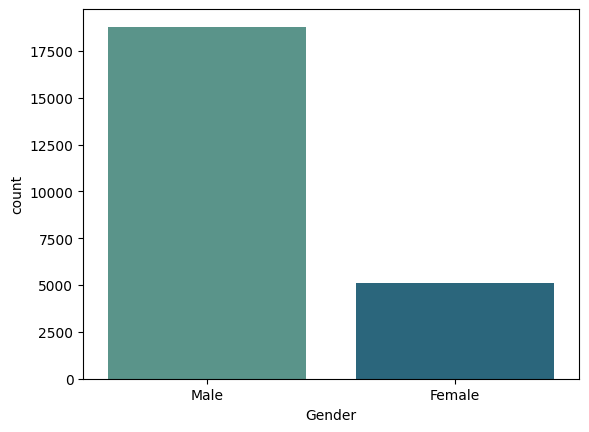

In [14]:
sns.countplot(data=df, x='Gender', hue='Gender', palette='crest')

### Number of Males and Females who bought from each company

<Axes: xlabel='Count', ylabel='Company'>

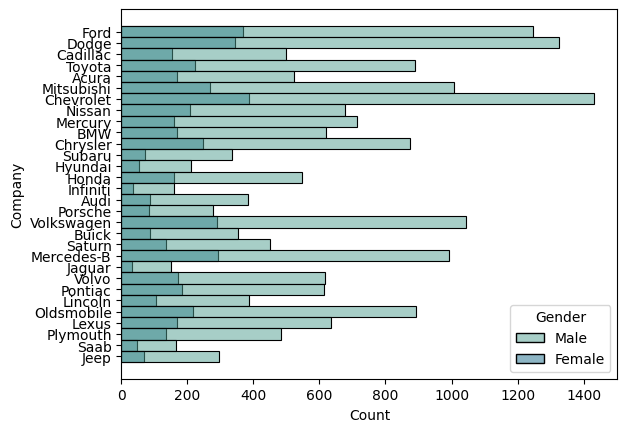

In [15]:
sns.histplot(data=df, y='Company', hue='Gender', palette='crest')

### Number of Males and Females who bought each model car

<Axes: xlabel='count', ylabel='Model'>

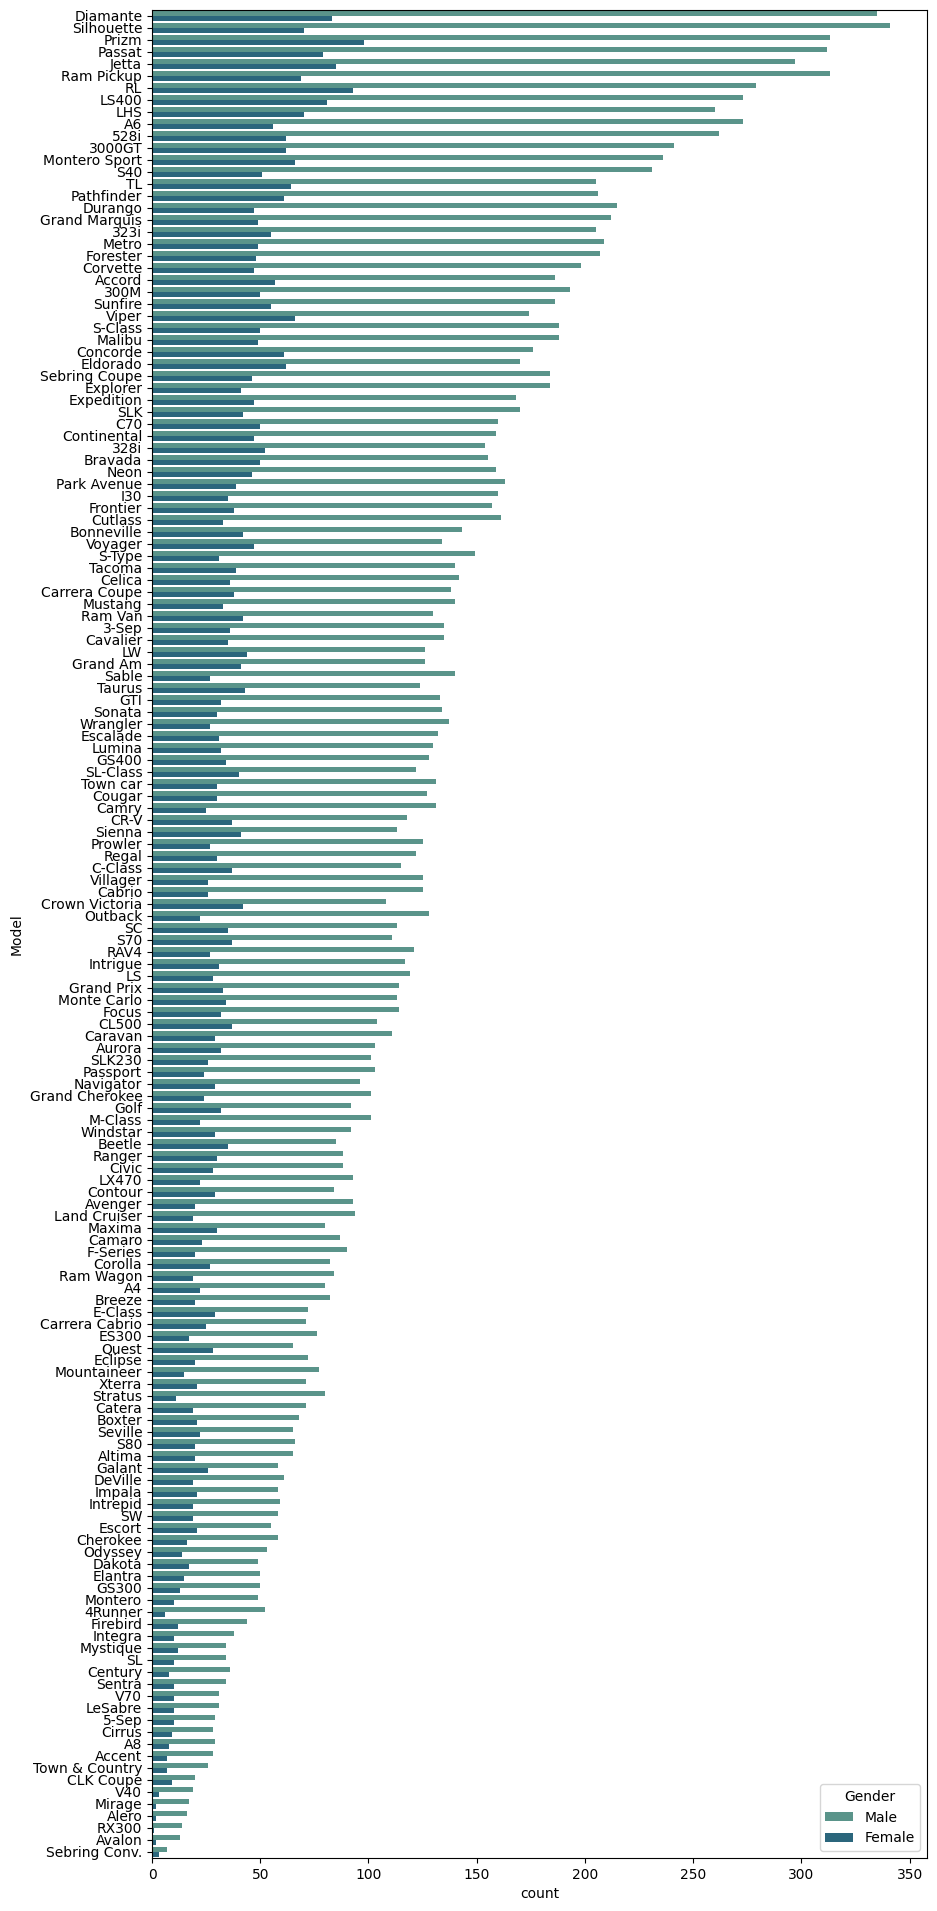

In [16]:
plt.figure(figsize=(10, 24))
sns.countplot(data=df, y='Model', hue='Gender', palette='crest', order=df['Model'].value_counts().index)

### Number of Cars that were sold from each company

<Axes: xlabel='count', ylabel='Company'>

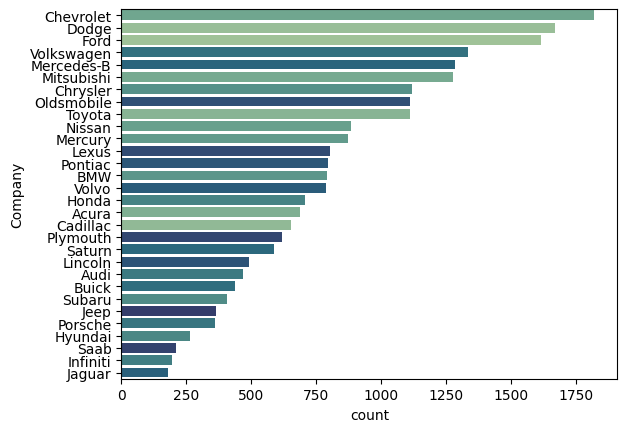

In [17]:
sns.countplot(data=df, y='Company', palette='crest', hue='Company', order=df['Company'].value_counts().index)

### Number of Cars sold per Dealer Region

<Axes: xlabel='Dealer_Region', ylabel='count'>

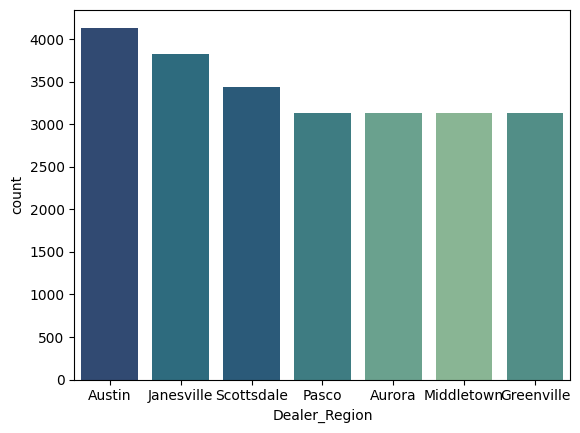

In [18]:
sns.countplot(data=df, x='Dealer_Region', hue='Dealer_Region', palette='crest', order=df['Dealer_Region'].value_counts().index)

### Average Annual Income between Males and Females

<Axes: xlabel='Annual_Income', ylabel='Gender'>

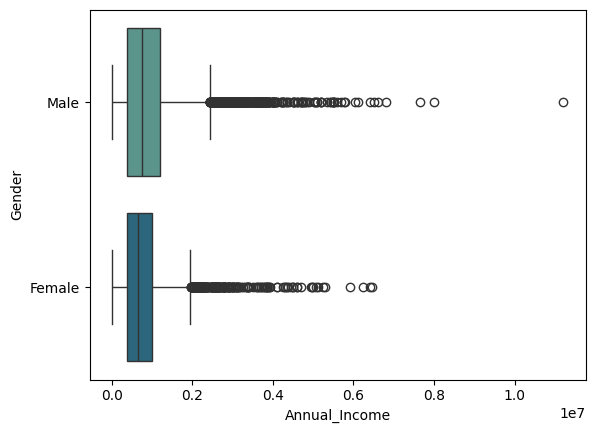

In [19]:
sns.boxplot(data=df, y='Gender', x='Annual_Income', hue='Gender', palette='crest')

### Average Price of a Car per Company

<Axes: xlabel='Price_($)', ylabel='Company'>

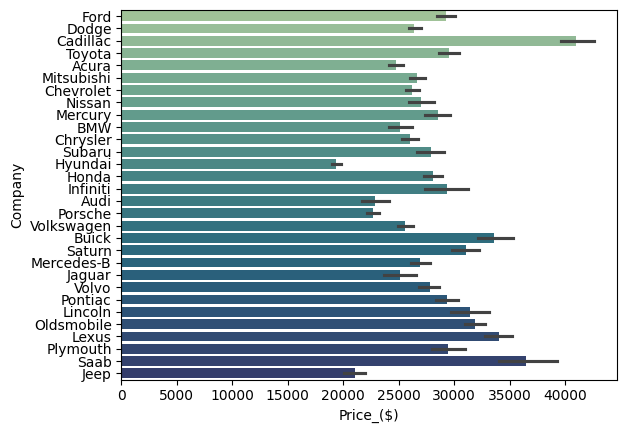

In [20]:
sns.barplot(data=df, x='Price_($)', y='Company', hue='Company', palette='crest')

### Average Price of a Car per Dealer Region

<Axes: xlabel='Price_($)', ylabel='Dealer_Region'>

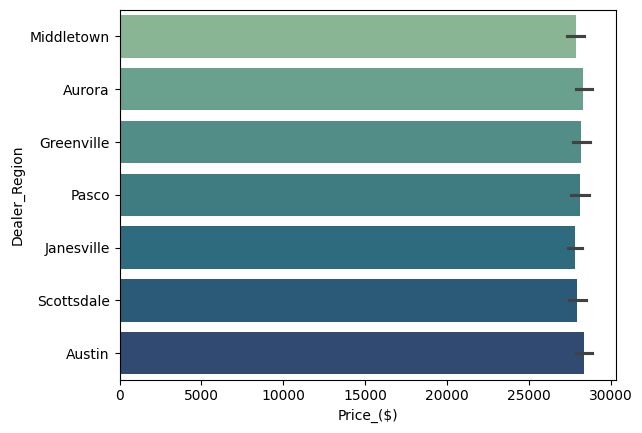

In [21]:
sns.barplot(data=df, x='Price_($)', y='Dealer_Region', hue='Dealer_Region', palette='crest')

### Average Price a Male and Female are paying for a car

<Axes: xlabel='Price_($)', ylabel='Gender'>

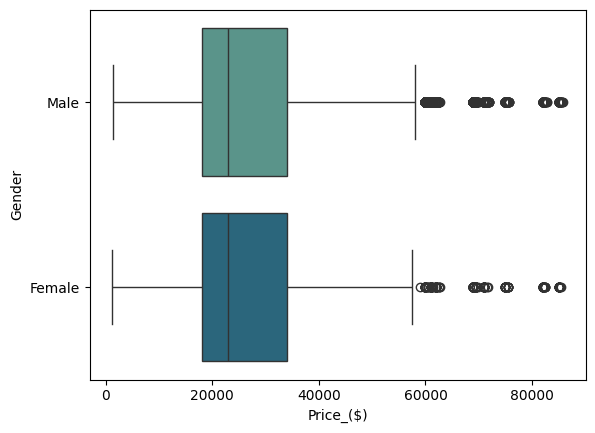

In [22]:
sns.boxplot(data=df, x='Price_($)', y='Gender', hue='Gender', palette='crest')

### Most Common Type of Engine bought

<Axes: xlabel='Engine', ylabel='count'>

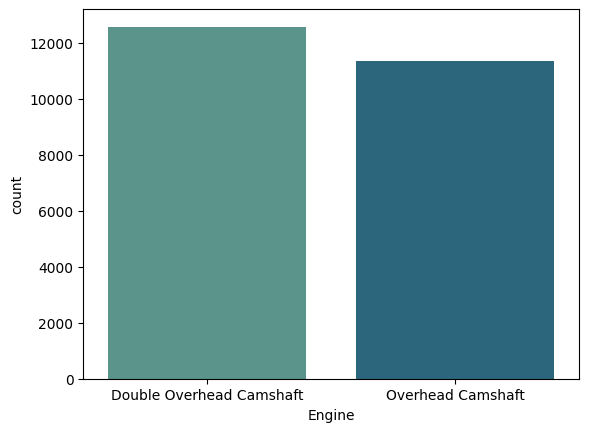

In [23]:
sns.countplot(data=df, x='Engine', hue='Engine', palette='crest')

### Most Common Type of Transmission bought

<Axes: xlabel='Transmission', ylabel='count'>

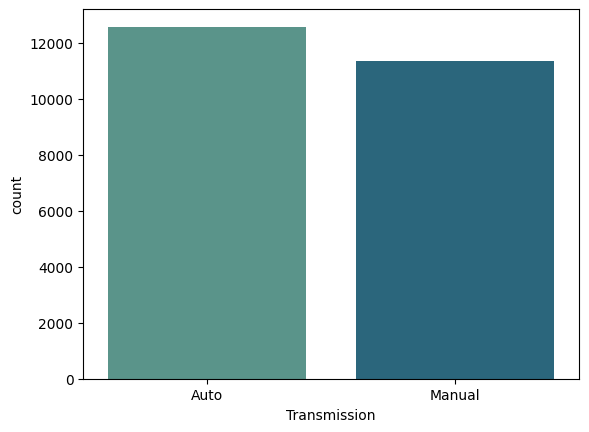

In [24]:
sns.countplot(data=df, x='Transmission', hue='Transmission', palette='crest')

### Most Common Type of Color bought

<Axes: xlabel='Color', ylabel='count'>

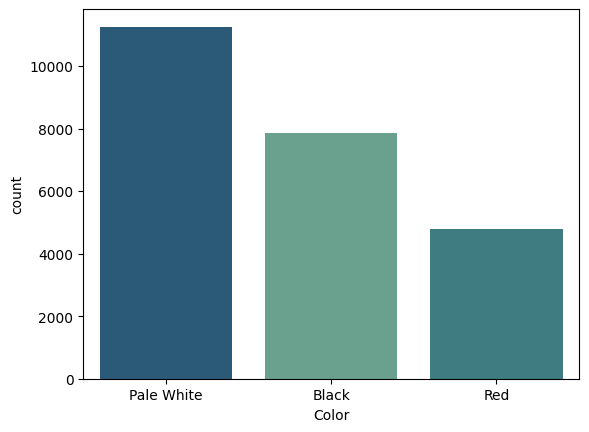

In [25]:
sns.countplot(data=df, x='Color', hue='Color', palette='crest',  order=df['Color'].value_counts().index)

### Most Common Type of Body Style bought

<Axes: xlabel='Body_Style', ylabel='count'>

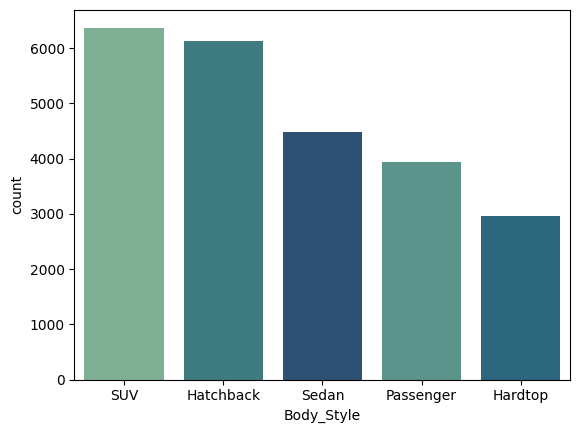

In [26]:
sns.countplot(data=df, x='Body_Style', hue='Body_Style', palette='crest', order=df['Body_Style'].value_counts().index)